## Buiseness Problem Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## Data Understanding

In [2]:
df=pd.read_excel("insurance.xlsx")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


### Data Cleaning

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [11]:
df['children'].nunique()

6

In [12]:
print(df['sex'].value_counts())
df['sex'].nunique()

sex
male      675
female    662
Name: count, dtype: int64


2

In [13]:
print(df['smoker'].value_counts())
df['smoker'].nunique()

smoker
no     1063
yes     274
Name: count, dtype: int64


2

In [14]:
print(df['region'].value_counts())
df['region'].nunique()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


4

In [15]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

## Exploratory Data Analysis

In [16]:
continuous= ['age',  'bmi',  'expenses']
discrete_count=['children']
discrete_categorical=['sex','smoker','region']

In [17]:
df[discrete_categorical].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [18]:
df[continuous].corr()

,age,bmi,expenses
age,1.000000,0.109414,0.298308
bmi,0.109414,1.000000,0.198637
expenses,0.298308,0.198637,1.000000


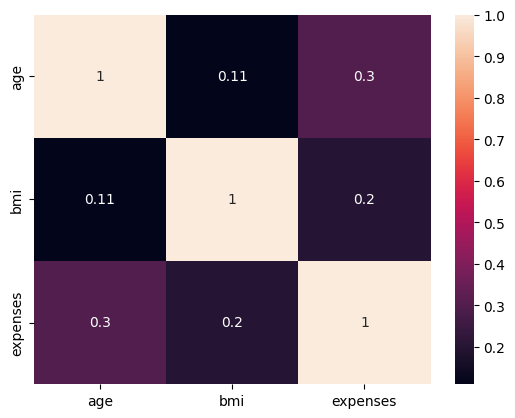

In [19]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

In [20]:
df.drop('region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [21]:
df['sex'].replace({'female':[0],'male':[1]},inplace=True)
df['smoker'].replace({'no':[0],'yes':[1]},inplace=True)

In [22]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


### Seperate Input & Output Columns

In [23]:
X=df.drop('expenses',axis=1)
y=df['expenses']

### Best Random State Number

In [24]:
train=[]
cv=[]

for i in range(0,100):
    from sklearn.model_selection import train_test_split,cross_val_score
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(X_train,y_train)
    ypred_train=model.predict(X_train)
    

    from sklearn.metrics import r2_score
    train.append(r2_score(y_train,ypred_train))
    cv.append((cross_val_score(model,X_train,y_train,cv=5).mean()))
    

a=pd.DataFrame({"Train":train,"CV":cv})
b=a[abs(a['Train']-a['CV'])<=0.05]
rs=b[(b['CV']==b['CV'].max())].index.tolist()[0]

print("Best Random state number is ",rs)   


Best Random state number is  55


## Modelling & Evaluation

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rs)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
estimator=Lasso()
param_grid={'alpha':list(range(1,100))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(X_train,y_train)
alpha=model_hp.best_params_
a=alpha['alpha']
a

61

## Alternative Way

In [27]:
final_model=model_hp.best_estimator_

print(final_model.coef_)
print(final_model.intercept_)

pt=final_model.predict(X_train)
ptt=final_model.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Train R2 score is {r2_score(y_train,pt)}")
print(f"CV score is {(cross_val_score(final_model,X_train,y_train,cv=5)).mean()}")
print(f"Test R2 score is {r2_score(y_test,ptt)}")

[  242.93791488    -0.           328.57815363   430.33229582
 23865.75534477]
-11745.273422704073
Train R2 score is 0.7649490067496241
CV score is 0.760285571458688
Test R2 score is 0.6845975873485619


## Final Model

In [28]:
df=df.drop('sex',axis=1) #We will drop sex column because the coefficient of sex column has become zero(0) which means it is not importnt column.
X=df.drop('expenses',axis=1)
y=df['expenses']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rs)

from sklearn.linear_model import Lasso
best_model=Lasso(alpha=a)

best_model.fit(X_train,y_train)

print(f"Intercept {best_model.intercept_}")
print(f"Coefficient {best_model.coef_}")

ypred_train=best_model.predict(X_train)
ypred_test=best_model.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Train R2 score is {r2_score(y_train,ypred_train)}")
print(f"CV score is {(cross_val_score(best_model,X_train,y_train,cv=5)).mean()}")
print(f"Test R2 score is {r2_score(y_test,ypred_test)}")

Intercept -11745.271221313282
Coefficient [  242.93784104   328.5781749    430.33232959 23865.75530613]
Train R2 score is 0.7649490067015959
CV score is 0.7603119463978815
Test R2 score is 0.684597572939912


## Prediction On New Data

In [29]:
input_data={"age":35,
           "sex":"Male",
           "bmi":31.4,
           "children":5,
           "smoker":"yes",
           "region":"southeast"}

In [30]:
df_test=pd.DataFrame(input_data,index=[0])
df_test

,age,sex,bmi,children,smoker,region
0,35,Male,31.4,5,yes,southeast


In [31]:
df_test.drop(['region'],axis=1,inplace=True)
df_test['smoker'].replace({"no":0,"yes":1},inplace=True)
df_test['sex'].replace({"Female":0,"Male":1},inplace=True)
df_test.drop(['sex'],axis=1,inplace=True)

df_test

,age,bmi,children,smoker
0,35,31.4,5,1


In [32]:
best_model.predict(df_test)

array([33092.32486095])

# Conclusion

## Key Findings
- The Lasso Regression model was implemented to predict insurance expenses based on features such as age, BMI, number of children, smoking status, and region.
- The dataset was preprocessed, including handling categorical variables and scaling numerical features where necessary.
- Lasso Regression was used to introduce regularization, which helps in feature selection by shrinking the coefficients of less important variables to zero.

## Model Performance
- The model's performance was evaluated using metrics such as **Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE)**.
- Lasso Regression successfully reduced the complexity of the model by eliminating some features while maintaining predictive power.
- The regularization strength (**alpha parameter**) was tuned to optimize model performance.

## Insights and Implications
- The most significant predictor of insurance expenses was found to be **smoking status**, followed by **BMI and age**.
- Lasso Regression proved to be useful in identifying and removing less relevant features, making the model more interpretable.
- If further improvement is needed, alternative models such as **Ridge Regression or ElasticNet** could be explored.



Overall, Lasso Regression provided a robust and interpretable model for predicting insurance expenses, making it a valuable approach for feature selection and regularized regression modeling.
